In [15]:
library('lattice')
trellis.par.set(col.whitebg())
source('readdata.R')
res <- parseTrace("../data/logout.dat")
res = as.data.frame(res)
pktsize <- attr(res,'pktsize')
servperflow <- attr(res,'bottleneckrate')/attr(res,'numflows')

rescale <- res$type %in% c('queueapprox','tcp','tcprecord')
res$val1[rescale] <- res$val1[rescale]/pktsize
res$val2[rescale] <- res$val2[rescale]/pktsize
res$val3[rescale] <- res$val3[rescale]/pktsize

idtype <- res$id %in% c('Tcp1','Subflow1','Subflow2')
res = res[idtype,]

res$id = droplevels(res$id)

resbak = res

[1] "# pktsize=1000 bytes"
[1] "# bottleneckrate=500 pkt/sec"
[1] "# buffer=103 pkt"
[1] "# rtt=0.05"
[1] "# rtt=0.3"
[1] "# numrecords=1507157"


Warning message in readBin(f, "int", n = numrec, size = 4, signed = FALSE):
“'signed = FALSE' is only valid for integers of sizes 1 and 2”Warning message in readBin(f, "int", n = numrec, size = 4, signed = FALSE):
“'signed = FALSE' is only valid for integers of sizes 1 and 2”Warning message in `levels<-`(`*tmp*`, value = if (nl == nL) as.character(labels) else paste0(labels, :
“duplicated levels in factors are deprecated”Warning message in readBin(f, "int", n = numrec, size = 4, signed = FALSE):
“'signed = FALSE' is only valid for integers of sizes 1 and 2”Warning message in `levels<-`(`*tmp*`, value = if (nl == nL) as.character(labels) else paste0(labels, :
“duplicated levels in factors are deprecated”Warning message in `levels<-`(`*tmp*`, value = if (nl == nL) as.character(labels) else paste0(labels, :
“duplicated levels in factors are deprecated”

Warning message in draw.key(simpleKey(...), draw = FALSE):
“not enough rows for columns”

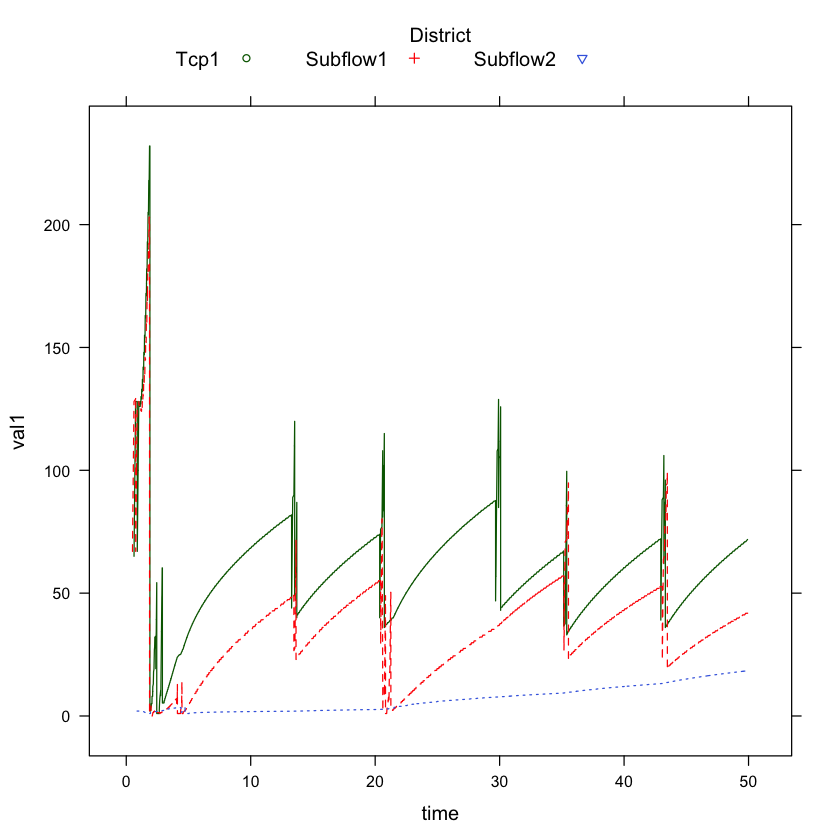

In [21]:
my.plot <- xyplot(val1~time, data=resbak, group=id, subset= (type=='tcp' | type=='tcprecord' |
         type=='queueapprox') & (id!='ratelim%1') &
         time>0 & time<50, type='l',
      auto.key=list(space="top", columns=4, 
                       title="District", cex.title=1))

#trellis.device(device="png", filename="xyplot.png")
#print(my.plot)
#dev.off()

print(my.plot)

In [24]:
head(resbak
    )

,time,type,id,ev,val1,val2,val3
1,0.500502025527,tcp,Subflow1,tcp_rcv,67,67,67
2,0.500502025527,tcpstate,Subflow1,tcpstate_cntrl,67000,4294967295,0
3,0.500502025527,tcpstate,Subflow1,tcpstate_seq,66000,131000,694818119149
4,0.502502025527,tcp,Subflow1,tcp_rcv,68,68,68
5,0.502502025527,tcpstate,Subflow1,tcpstate_cntrl,68000,4294967295,0
6,0.502502025527,tcpstate,Subflow1,tcpstate_seq,67000,133000,706256154236
